### Practical Motivation


---
We are often told that we need at least 7 hours of sleep to be well-rested. However, we often still feel tired and unsufficiently rested even after sleeping for at least 7 hours. Are other variables apart from the duration of our sleep affecting our sleep quality?

### Problem Definition


---
**Can we predict a person's sleep quality using information on his sleep cycle, the time he goes to sleep, and his lifestyle throughout the day?**

We will only use data where the person has slept for at least 7 hours.


### Dataset Source
---
The dataset we will be using is the Sleep Data dataset created by Dana Diotte and shared on Kaggle. The dataset consists only of Dana Diotte's own sleep information collected between 2014-2018 using the Sleep Cycle App from Northcube on iOS.
 The dataset can be found here: https://www.kaggle.com/danagerous/sleep-data

Our problem is a **supervised** **regression** machine learning task.

**Supervised:** Response and predictors values are given to us.

**Regression:** The response variable we are predicting is numeric.


# Import Dataset

We begin by importing the necessary libaries for our project

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import datetime
pd.options.mode.chained_assignment = None  # default='warn'
sb.set() # set the default Seaborn style for graphics

Import the dataset - `sleepdata.csv`

Take a quick look at the data using the `head` function

In [ ]:
sleep_data = pd.read_csv('https://raw.githubusercontent.com/shinghao/sleep-data-analysis/main/sleepdata.csv',sep=";")
sleep_data.head()

,Start,End,Sleep quality,Time in bed,Wake up,Sleep Notes,Heart rate,Activity (steps)
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100%,8:32,:),NaN,59.0,0
1,2014-12-30 21:17:50,2014-12-30 21:33:54,3%,0:16,:|,Stressful day,72.0,0
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98%,8:30,:|,NaN,57.0,0
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65%,7:32,NaN,NaN,NaN,0
4,2015-01-01 22:12:10,2015-01-02 04:56:35,72%,6:44,:),Drank coffee:Drank tea,68.0,0


Check the statistics of the dataset using `shape` and `info`

In [ ]:
print("shape: ",(sleep_data.shape),"\n")
print(sleep_data.info())

shape:  (887, 8) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Start             887 non-null    object 
 1   End               887 non-null    object 
 2   Sleep quality     887 non-null    object 
 3   Time in bed       887 non-null    object 
 4   Wake up           246 non-null    object 
 5   Sleep Notes       652 non-null    object 
 6   Heart rate        162 non-null    float64
 7   Activity (steps)  887 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 55.6+ KB
None


Observations:
- There are `8` variables/columns and `887` total rows in the dataset 
- `6` variables is of `object` type, 'Heart rate' is of `float` type and 'Activity (steps)' is of `int` type.
- There are `3` variables with obvious missing values - 'Wake up', 'Sleep Notes' and 'Heart rate'.
- `Sleep quality` is the response variable, while the remaining variables are possible predictors


Take a closer look at the dataset by checking the number of unique values using `value_counts`. 

In [ ]:
for var in sleep_data:
  print("{0}\n".format(sleep_data[var].value_counts(dropna= False)))

2014-12-29 22:57:49    1
2017-03-16 22:33:05    1
2017-03-05 00:12:24    1
2017-03-05 22:01:00    1
2017-03-06 22:01:27    1
                      ..
2016-03-18 22:17:45    1
2016-03-20 22:13:36    1
2016-03-21 22:37:03    1
2016-03-22 21:22:46    1
2018-02-16 22:52:29    1
Name: Start, Length: 887, dtype: int64

2014-12-30 07:30:13    1
2017-03-17 06:37:29    1
2017-03-05 08:28:54    1
2017-03-06 06:08:33    1
2017-03-07 06:22:56    1
                      ..
2016-03-19 07:47:51    1
2016-03-21 07:26:59    1
2016-03-22 07:32:00    1
2016-03-23 06:19:17    1
2018-02-17 07:48:04    1
Name: End, Length: 887, dtype: int64

81%    42
83%    39
79%    37
77%    36
74%    33
       ..
46%     1
13%     1
23%     1
16%     1
8%      1
Name: Sleep quality, Length: 79, dtype: int64

8:01    18
7:32    16
8:00    15
8:02    15
7:35    14
        ..
8:45     1
6:36     1
0:42     1
8:59     1
0:36     1
Name: Time in bed, Length: 229, dtype: int64

NaN    641
:)     216
:|      29
:(       1
Name

Observations:
- `Start` & `End` contains the date and time in the format (YY-MM-DD HH:MM:SS)
- `Sleep quality`, the response, is a % value from 0-100
- `Time in bed` contains time data in the format (HH:MM)
- `Wake up` contains only 3 categorical values - ':)', ':|', ':('
- `Sleep Notes` is a categorical data containing any possible combinations of the 5 following options - 'Drank coffee', 'Drank tea', 'Worked out', 'Stressful day', 'Ate late'. We assume that if a particular option is present in the row, it will mean a 'True' to the option, whilst if the option is absent from the row, it will be taken as a 'False' to the option. If the row is a NaN value, it will be taken as a 'False' for all 5 options. 
- `Heart rate` is a numeric data
- `Activity (steps)` is a numeric data with 418 '0' values. This is suprising as that would mean that in 418 days, the person did not take a single step. This is unlikely and we believe that the person did not record the number of steps he took on those particular days. Hence we will be taking the '0' values as NaN values instead

It seems that the data can be split into numeric & categorical as follows:

Numeric Data : `Start`, `End`, `Sleep quality`, `Time in bed`, `Heart rate`, `Activity (steps)`

Categorical Data : `Wake up`, `Sleep Notes`

# Data Preparation and Cleaning

The above statistics showed us that we will need to do some cleaning before we can explore the dataset further.

In this section, we will be:
- Converting the necessary variables to the correct datatype formats
- Dropping rows where 'Time in bed' < 7hours (as per our problem statement)
- Creating new variable columns based on existing variables in our dataset
- Extracting `Sleep Notes` into 5 seperate boolean columns
- Dropping columns with heavy null values

## Convert the necessary datatypes

###Convert 'Start' and 'End' from `object` to `Datetime` format type



In [ ]:
sleep_data['Start'] = pd.to_datetime(sleep_data['Start'])
sleep_data['End'] = pd.to_datetime(sleep_data['End'])

print(sleep_data['Start'].head())
print()
print(sleep_data['End'].head())

0   2014-12-29 22:57:49
1   2014-12-30 21:17:50
2   2014-12-30 22:42:49
3   2014-12-31 22:31:01
4   2015-01-01 22:12:10
Name: Start, dtype: datetime64[ns]

0   2014-12-30 07:30:13
1   2014-12-30 21:33:54
2   2014-12-31 07:13:31
3   2015-01-01 06:03:01
4   2015-01-02 04:56:35
Name: End, dtype: datetime64[ns]


###Convert 'Sleep quality' from `Object` to `integer` type and remove the '%' symbol

In [ ]:
# Convert sleep_quality from object type to string type to remove the '%'
sleep_data['Sleep quality'] = sleep_data['Sleep quality'].astype(str)
sleep_data['Sleep quality'] = sleep_data['Sleep quality'].str[:-1] #remove % from string

# Convert sleep_quality from string type to int type
sleep_data['Sleep quality'] = sleep_data['Sleep quality'].astype(int)
sleep_data['Sleep quality'].head()

0    100
1      3
2     98
3     65
4     72
Name: Sleep quality, dtype: int64

###Convert 'Time in bed' from `object` (hh:mm) to total number of minutes represented by `integer` type

In [ ]:
# Convert time in bed from object to datetime type
sleep_data['Time in bed'] = pd.to_datetime(sleep_data['Time in bed'])

# Convert time in bed from datetime to total minutes (integer)
sleep_data['Time in bed'] = sleep_data['Time in bed'].dt.hour*60+sleep_data['Time in bed'].dt.minute
sleep_data['Time in bed'].head()

0    512
1     16
2    510
3    452
4    404
Name: Time in bed, dtype: int64

## Drop rows where 'Time in bed' < 7hours

As per our problem statement, we will only be looking at data where the person sleeps for at least 7 hours. Hence, we will be removing the rows where `Time in bed` is less than 420 minutes

In [ ]:
minMinutes = 7*60 
print("Original:", sleep_data.shape)
sleep_data_clean = sleep_data.drop(sleep_data[sleep_data['Time in bed'] < minMinutes].index)
print("After:", sleep_data_clean.shape)
print("Rows removed:", sleep_data.shape[0]-sleep_data_clean.shape[0])



Original: (887, 8)
After: (767, 8)
Rows removed: 120


`120` rows have been removed from the dataset. We are now left with `767` rows to work on.

## Create new variable columns

###Extract 'Sleep notes' into 5 new seperate boolean variables:
- Drank coffee (True/False)
- Drank tea (True/False)
- Worked out (True/False)
- Stressful day (True/False)
- Ate late (True/False)


We assume that if a particular option is present in the row, it will mean a 'True' to the option, whilst if the option is absent from the row, it will mean a 'False' to the option. If the row is a NaN value, it will be taken as a 'False' for all 5 options.

In [ ]:
sleep_data_clean['Drank coffee'] = np.where(sleep_data_clean['Sleep Notes'].notna() & sleep_data_clean['Sleep Notes'].str.contains('Drank coffee'), True, False)
sleep_data_clean['Drank tea'] = np.where(sleep_data_clean['Sleep Notes'].notna() & sleep_data_clean['Sleep Notes'].str.contains('Drank tea'), True, False)
sleep_data_clean['Worked out'] = np.where(sleep_data_clean['Sleep Notes'].notna() & sleep_data_clean['Sleep Notes'].str.contains('Worked out'), True, False)
sleep_data_clean['Stressful day'] = np.where(sleep_data_clean['Sleep Notes'].notna() & sleep_data_clean['Sleep Notes'].str.contains('Stressful day'), True, False)
sleep_data_clean['Ate late'] = np.where(sleep_data_clean['Sleep Notes'].notna() & sleep_data_clean['Sleep Notes'].str.contains('Ate late'), True, False)

sleep_data_clean[['Sleep Notes','Drank coffee', 'Drank tea', 'Worked out', 'Stressful day', 'Ate late']].head(10)


,Sleep Notes,Drank coffee,Drank tea,Worked out,Stressful day,Ate late
0,NaN,False,False,False,False,False
2,NaN,False,False,False,False,False
3,NaN,False,False,False,False,False
5,Drank coffee:Drank tea,True,True,False,False,False
6,Drank tea,False,True,False,False,False
7,Ate late:Drank coffee,True,False,False,False,True
8,Drank coffee:Drank tea:Worked out,True,True,True,False,False
9,Drank tea:Worked out,False,True,True,False,False
10,Drank coffee:Drank tea:Stressful day,True,True,False,True,False
11,Drank coffee:Drank tea,True,True,False,False,False


Drop the 'Sleep Notes' column that we have already extracted out 

In [ ]:
sleep_data_clean.pop('Sleep Notes')
sleep_data_clean.head()

,Start,End,Sleep quality,Time in bed,Wake up,Heart rate,Activity (steps),Drank coffee,Drank tea,Worked out,Stressful day,Ate late
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100,512,:),59.0,0,False,False,False,False,False
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98,510,:|,57.0,0,False,False,False,False,False
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65,452,NaN,NaN,0,False,False,False,False,False
5,2015-01-03 00:34:57,2015-01-03 07:47:23,83,432,:),60.0,0,True,True,False,False,False
6,2015-01-04 00:23:06,2015-01-04 07:37:09,78,434,NaN,NaN,0,False,True,False,False,False


### Create new column - Sleep cycle & Sleep cycle offset

Calculate the maximum number of `Sleep cycles` according to `Time in bed` considering that each sleep cycle lasts 90 minutes


In [ ]:
sleep_data_clean['Sleep cycle'] = sleep_data_clean['Time in bed']/90
# Floor to nearest whole number by converting to int
sleep_data_clean['Sleep cycle'] = sleep_data_clean['Sleep cycle'].astype(int)

sleep_data_clean[['Time in bed', 'Sleep cycle']].head()


,Time in bed,Sleep cycle
0,512,5
2,510,5
3,452,5
5,432,4
6,434,4


Calculate the `Sleep cycle offset` with the formula:

`Time in bed` - (`Sleep cycle` * 90)

Essentially, `Sleep cycle offset` is the leftover minutes after calculating the number of sleep cycles.

In [ ]:
sleep_data_clean['Sleep cycle offset'] = sleep_data_clean['Time in bed']-(sleep_data_clean['Sleep cycle'] * 90)

sleep_data_clean[['Time in bed', 'Sleep cycle offset']].head()

,Time in bed,Sleep cycle offset
0,512,62
2,510,60
3,452,2
5,432,72
6,434,74


###Create `Start time` column using data extracted from 'Start'
- Represented in integer as HH (rounded off to nearest hour)
- Will be considered as a categorical variable as there is only a few categories of `Start time` value

In [ ]:
# Create Start time Column (HH represented as a int)
sleep_data_clean['Start time'] = sleep_data_clean['Start'].dt.round('H').dt.hour
sleep_data_clean.head()

,Start,End,Sleep quality,Time in bed,Wake up,Heart rate,Activity (steps),Drank coffee,Drank tea,Worked out,Stressful day,Ate late,Sleep cycle,Sleep cycle offset,Start time
0,2014-12-29 22:57:49,2014-12-30 07:30:13,100,512,:),59.0,0,False,False,False,False,False,5,62,23
2,2014-12-30 22:42:49,2014-12-31 07:13:31,98,510,:|,57.0,0,False,False,False,False,False,5,60,23
3,2014-12-31 22:31:01,2015-01-01 06:03:01,65,452,NaN,NaN,0,False,False,False,False,False,5,2,23
5,2015-01-03 00:34:57,2015-01-03 07:47:23,83,432,:),60.0,0,True,True,False,False,False,4,72,1
6,2015-01-04 00:23:06,2015-01-04 07:37:09,78,434,NaN,NaN,0,False,True,False,False,False,4,74,0


`Start` variable will not be used as a predictor. However, we will still include the variable in our dataframe as we will be using the start date to visualise `sleep quality` response variable using a time series diagram.

Since we have already extracted the time out of `Start`, we convert `Start` to date only.

We will also rename `Start` column to `Start date`.

In [ ]:
sleep_data_clean['Start'] = sleep_data_clean['Start'].dt.date
sleep_data_clean.head()


,Start,End,Sleep quality,Time in bed,Wake up,Heart rate,Activity (steps),Drank coffee,Drank tea,Worked out,Stressful day,Ate late,Sleep cycle,Sleep cycle offset,Start time
0,2014-12-29,2014-12-30 07:30:13,100,512,:),59.0,0,False,False,False,False,False,5,62,23
2,2014-12-30,2014-12-31 07:13:31,98,510,:|,57.0,0,False,False,False,False,False,5,60,23
3,2014-12-31,2015-01-01 06:03:01,65,452,NaN,NaN,0,False,False,False,False,False,5,2,23
5,2015-01-03,2015-01-03 07:47:23,83,432,:),60.0,0,True,True,False,False,False,4,72,1
6,2015-01-04,2015-01-04 07:37:09,78,434,NaN,NaN,0,False,True,False,False,False,4,74,0


In [ ]:
sleep_data_clean = sleep_data_clean.rename({'Start': 'Start date'}, axis=1)
sleep_data_clean.head(n=1)


,Start date,End,Sleep quality,Time in bed,Wake up,Heart rate,Activity (steps),Drank coffee,Drank tea,Worked out,Stressful day,Ate late,Sleep cycle,Sleep cycle offset,Start time
0,2014-12-29,2014-12-30 07:30:13,100,512,:),59.0,0,False,False,False,False,False,5,62,23


## Drop the columns that we will not be using

We will first drop `End` column as we will not be using it. Only `Start date` is required for our time series visualisation.

In [ ]:
sleep_data_clean.pop('End')
sleep_data_clean.head(n=1)

,Start date,Sleep quality,Time in bed,Wake up,Heart rate,Activity (steps),Drank coffee,Drank tea,Worked out,Stressful day,Ate late,Sleep cycle,Sleep cycle offset,Start time
0,2014-12-29,100,512,:),59.0,0,False,False,False,False,False,5,62,23


Now we will drop `Time in bed` column as we will not be using the variable for our analysis.

In [ ]:
sleep_data_clean.pop('Time in bed')
sleep_data_clean.head(n=1)

,Start date,Sleep quality,Wake up,Heart rate,Activity (steps),Drank coffee,Drank tea,Worked out,Stressful day,Ate late,Sleep cycle,Sleep cycle offset,Start time
0,2014-12-29,100,:),59.0,0,False,False,False,False,False,5,62,23


###Missing Data

From above statistics, we know some of our variables have a huge number of null data.

Also, from above statistics, we observed that 'Activity (steps)' has a huge number of 0 values. As mentioned above, considering that 'Activity (steps)' is the total number of steps the person took in that particular day, we find it unlikely that the person did not take a single step throughout his entire day. Instead, we will assume that the 0 values are caused by the person not recording the number of steps he took on that day. Thus, we will take the 0 values as null values.



**We can visualise the number of null data using a seaborn `displot`**

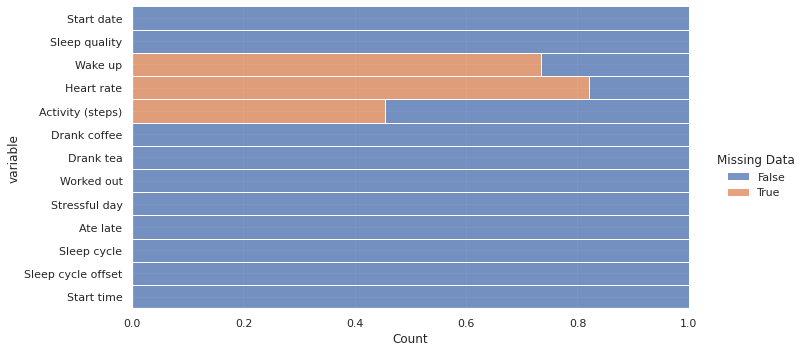

In [ ]:
sleep_data_clean['Activity (steps)'] = sleep_data_clean['Activity (steps)'].replace({'0':np.nan, 0:np.nan})

sb.displot(
    data=sleep_data_clean.isna().melt(value_name="Missing Data"),
    y="variable",
    hue="Missing Data",
    multiple="fill",
    aspect = 2
)

In [ ]:
print("Percentage of Null data: ")
print("Wake up \t :", sleep_data_clean['Wake up'].isna().sum() * 100 / len(sleep_data_clean['Wake up']), '%')
print("Heart rate \t :", sleep_data_clean['Heart rate'].isna().sum() * 100 / len(sleep_data_clean['Heart rate']), '%')
print("Activity (steps) :", sleep_data_clean['Activity (steps)'].isna().sum() * 100 / len(sleep_data_clean['Activity (steps)']), '%')

Percentage of Null data: 
Wake up 	 : 73.53324641460235 %
Heart rate 	 : 82.00782268578878 %
Activity (steps) : 45.5019556714472 %


With such a high percentage of Null values, these 3 variables will probably not be useful to our model. However before dropping both the variables, we will examine them further to ensure that we are not dropping an important variable.

**'Wake up'**

In [ ]:
sleep_data_clean['Wake up'].value_counts()

:)    177
:|     26
Name: Wake up, dtype: int64

'Wake up' is a categorical variable consisting of 3 emojis representing the person's feelings upon waking up. We believe that this variable will not be useful in predicting the actual 'Sleep quality' of the person. 

Hence, we will be droping it from our dataframe.

In [ ]:
sleep_data_clean.pop('Wake up')
sleep_data_clean.head(n=1)

,Start date,Sleep quality,Heart rate,Activity (steps),Drank coffee,Drank tea,Worked out,Stressful day,Ate late,Sleep cycle,Sleep cycle offset,Start time
0,2014-12-29,100,59.0,NaN,False,False,False,False,False,5,62,23


**'Heart rate'**

Before dropping the 'Heart rate', we will take a look at the correlation between the non NaN values of 'Heart rate' and their corresponding 'Sleep quality' value.

In [ ]:
sleep_data_clean[['Heart rate', 'Sleep quality']].corr()

,Heart rate,Sleep quality
Heart rate,1.000000,-0.026565
Sleep quality,-0.026565,1.000000


Since 'Heart rate' has such a low relation to our response variable we will be dropping it from our dataframe

In [ ]:
sleep_data_clean.pop('Heart rate')
sleep_data_clean.head(n=1)

,Start date,Sleep quality,Activity (steps),Drank coffee,Drank tea,Worked out,Stressful day,Ate late,Sleep cycle,Sleep cycle offset,Start time
0,2014-12-29,100,NaN,False,False,False,False,False,5,62,23


**'Activity (Steps)'**

With such a high percentage of NaN values, we will not attempt to fill in the missing data.

Before dropping the variable, we will take a look at the correlation between the non NaN values of ''Activity (steps)' and their corresponding 'Sleep quality' value to ensure that we are not dropping an important variable.

In [ ]:
activity_sleepqualityDF = sleep_data_clean[['Activity (steps)', 'Sleep quality']]
activity_sleepqualityDF = activity_sleepqualityDF[activity_sleepqualityDF['Activity (steps)'] != 0]
activity_sleepqualityDF.corr()

,Activity (steps),Sleep quality
Activity (steps),1.0000,-0.1977
Sleep quality,-0.1977,1.0000


Since 'Activity (steps)' has such a low relation to our response variable, we will be dropping it from our dataframe

In [ ]:
sleep_data_clean.pop('Activity (steps)')
sleep_data_clean.head(n=1)

,Start date,Sleep quality,Drank coffee,Drank tea,Worked out,Stressful day,Ate late,Sleep cycle,Sleep cycle offset,Start time
0,2014-12-29,100,False,False,False,False,False,5,62,23


## Clean categorical imbalance data

In [ ]:
#Extract the necessary categorical data variables
catDF = sleep_data_clean[['Sleep cycle', 'Start time','Drank coffee', 'Drank tea',	'Worked out', 'Stressful day', 'Ate late']]
catDF.head()

,Sleep cycle,Start time,Drank coffee,Drank tea,Worked out,Stressful day,Ate late
0,5,23,False,False,False,False,False
2,5,23,False,False,False,False,False
3,5,23,False,False,False,False,False
5,4,1,True,True,False,False,False
6,4,0,False,True,False,False,False


We noticed that some of our categorical data might have significant class imbalance. Let's take a look at this with a unique value count bar plot.

Number of unique Sleep cycle types : 4
Number of unique Start time types : 7
Number of unique Drank coffee types : 2
Number of unique Drank tea types : 2
Number of unique Worked out types : 2
Number of unique Stressful day types : 2
Number of unique Ate late types : 2


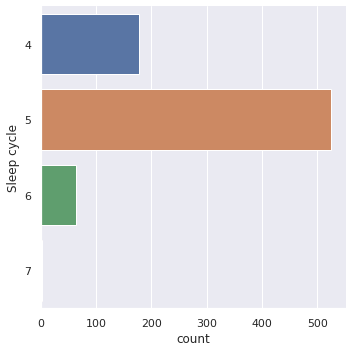

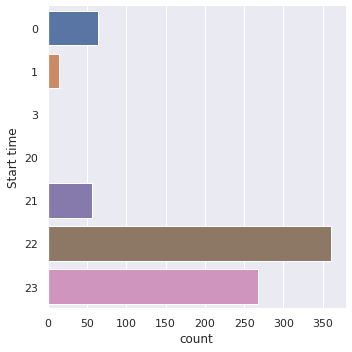

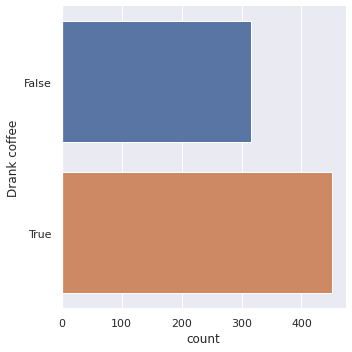

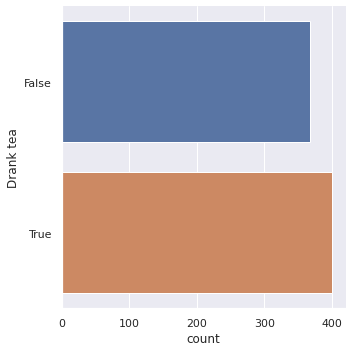

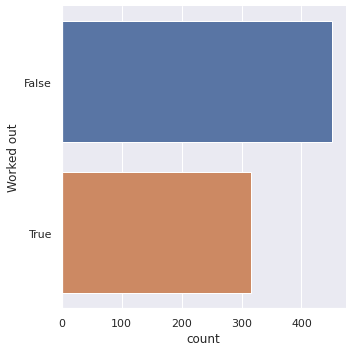

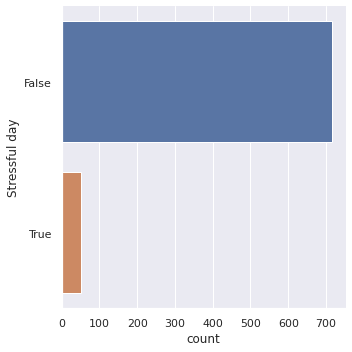

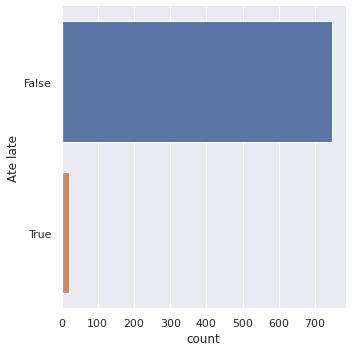

In [ ]:
for var in catDF:
    print("Number of unique", var ,"types :", len(catDF[var].unique()))
    sb.catplot(y = var, data = catDF, kind = "count")

We can see a significantly large class imbalance for some of the categorical variables namely:
- `Sleep cycle` - `7`
- `Start time` - `20`, `1`
- `Ate late` - extremely low ratio between true & false

Lets take a look at their specific value counts.

In [ ]:
print(catDF['Sleep cycle'].value_counts(),'\n')
print(catDF['Start time'].value_counts(),'\n')
print(catDF['Ate late'].value_counts())

5    525
4    177
6     63
7      2
Name: Sleep cycle, dtype: int64 

22    361
23    268
0      64
21     57
1      15
20      1
3       1
Name: Start time, dtype: int64 

False    747
True      20
Name: Ate late, dtype: int64


To prevent bias, we will be removing the rows with `7` sleep cycle, `20` start time and `3` start time.

We will also be removing `Ate late` from our model due to it's large class imbalance ratio.

In [ ]:
print("Original:", sleep_data_clean.shape)

# Drop rows
sleep_data_clean = sleep_data_clean.drop(sleep_data_clean[sleep_data_clean['Sleep cycle'] == 7].index)
sleep_data_clean = sleep_data_clean.drop(sleep_data_clean[sleep_data_clean['Start time'] == 20].index)
sleep_data_clean = sleep_data_clean.drop(sleep_data_clean[sleep_data_clean['Start time'] == 3].index)

print("After:", sleep_data_clean.shape)
print("Rows removed:", sleep_data.shape[0]-sleep_data_clean.shape[0])

# Reset Index
sleep_data_clean.reset_index(drop=True, inplace=True)

Original: (767, 10)
After: (763, 10)
Rows removed: 124


In [ ]:
# Drop 'Ate late' column
sleep_data_clean = sleep_data_clean.drop(columns='Ate late')
sleep_data_clean.head(n=1)

,Start date,Sleep quality,Drank coffee,Drank tea,Worked out,Stressful day,Sleep cycle,Sleep cycle offset,Start time
0,2014-12-29,100,False,False,False,False,5,62,23


##Dataframe information after processing

In [ ]:
sleep_data_clean.head()

,Start date,Sleep quality,Drank coffee,Drank tea,Worked out,Stressful day,Sleep cycle,Sleep cycle offset,Start time
0,2014-12-29,100,False,False,False,False,5,62,23
1,2014-12-30,98,False,False,False,False,5,60,23
2,2014-12-31,65,False,False,False,False,5,2,23
3,2015-01-03,83,True,True,False,False,4,72,1
4,2015-01-04,78,False,True,False,False,4,74,0


In [ ]:
sleep_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Start date          763 non-null    object
 1   Sleep quality       763 non-null    int64 
 2   Drank coffee        763 non-null    bool  
 3   Drank tea           763 non-null    bool  
 4   Worked out          763 non-null    bool  
 5   Stressful day       763 non-null    bool  
 6   Sleep cycle         763 non-null    int64 
 7   Sleep cycle offset  763 non-null    int64 
 8   Start time          763 non-null    int64 
dtypes: bool(4), int64(4), object(1)
memory usage: 32.9+ KB


In [ ]:
for var in sleep_data_clean:
  print("{0}\n".format(sleep_data_clean[var].value_counts(dropna= False)))

2015-05-24    2
2016-10-23    2
2017-04-23    2
2015-10-24    2
2017-12-29    2
             ..
2016-03-31    1
2016-04-02    1
2016-04-03    1
2016-04-04    1
2018-02-16    1
Name: Start date, Length: 737, dtype: int64

81    41
83    37
79    37
77    29
80    29
      ..
40     1
52     1
33     1
44     1
30     1
Name: Sleep quality, Length: 61, dtype: int64

True     449
False    314
Name: Drank coffee, dtype: int64

True     398
False    365
Name: Drank tea, dtype: int64

False    448
True     315
Name: Worked out, dtype: int64

False    713
True      50
Name: Stressful day, dtype: int64

5    525
4    176
6     62
Name: Sleep cycle, dtype: int64

31    19
5     18
2     17
11    16
30    16
      ..
68     3
38     3
53     2
84     2
55     2
Name: Sleep cycle offset, Length: 90, dtype: int64

22    361
23    268
0      64
21     55
1      15
Name: Start time, dtype: int64



Observations:
- There are `9` total variables/columns
- The response is `Sleep quality` which is a numeric variable
- `Start date` will not be used as a predictor and will only be used for time-series visualisations
- The other `7` variables are possible predictors

The `7` possible predictors consists of numeric and categorical data:
- `1` Numeric: `Sleep cycle offset`
- `6` Categorical: `Drank coffee`, `Drank tea`, `Worked out`, `Stressful day`, `Sleep cycle`, `Start time`

In [ ]:
'''
# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into random Train and Test
sleep_data_train, sleep_data_test = train_test_split(sleep_data_clean, test_size = 0.2, random_state=1)

# Check the sample sizes
print("Train Set :", sleep_data_train.shape)
print("Test Set  :", sleep_data_test.shape)
print("Total Set :", sleep_data_clean.shape)
'''

'\n# Import the required function from sklearn\nfrom sklearn.model_selection import train_test_split\n\n# Split the Dataset into random Train and Test\nsleep_data_train, sleep_data_test = train_test_split(sleep_data_clean, test_size = 0.2, random_state=1)\n\n# Check the sample sizes\nprint("Train Set :", sleep_data_train.shape)\nprint("Test Set  :", sleep_data_test.shape)\nprint("Total Set :", sleep_data_clean.shape)\n'

# Exploratory Analysis

We will first take a quick look at our newly prepared and cleaned data.

In [ ]:
sleep_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Start date          763 non-null    object
 1   Sleep quality       763 non-null    int64 
 2   Drank coffee        763 non-null    bool  
 3   Drank tea           763 non-null    bool  
 4   Worked out          763 non-null    bool  
 5   Stressful day       763 non-null    bool  
 6   Sleep cycle         763 non-null    int64 
 7   Sleep cycle offset  763 non-null    int64 
 8   Start time          763 non-null    int64 
dtypes: bool(4), int64(4), object(1)
memory usage: 32.9+ KB


In [ ]:
sleep_data_clean.head()

,Start date,Sleep quality,Drank coffee,Drank tea,Worked out,Stressful day,Sleep cycle,Sleep cycle offset,Start time
0,2014-12-29,100,False,False,False,False,5,62,23
1,2014-12-30,98,False,False,False,False,5,60,23
2,2014-12-31,65,False,False,False,False,5,2,23
3,2015-01-03,83,True,True,False,False,4,72,1
4,2015-01-04,78,False,True,False,False,4,74,0


## Response Variable

We will first start by exploring the response variable `Sleep quality`.

Check Summary Statistics using `describe`.

In [ ]:
sleep_data_clean[['Sleep quality']].describe()

,Sleep quality
count,763.000000
mean,77.655308
std,11.408448
min,30.000000
25%,71.000000
50%,79.000000
75%,85.000000
max,100.000000


Check Summary Statistics visually using `boxplot`,  `histogram` and `violinplot`

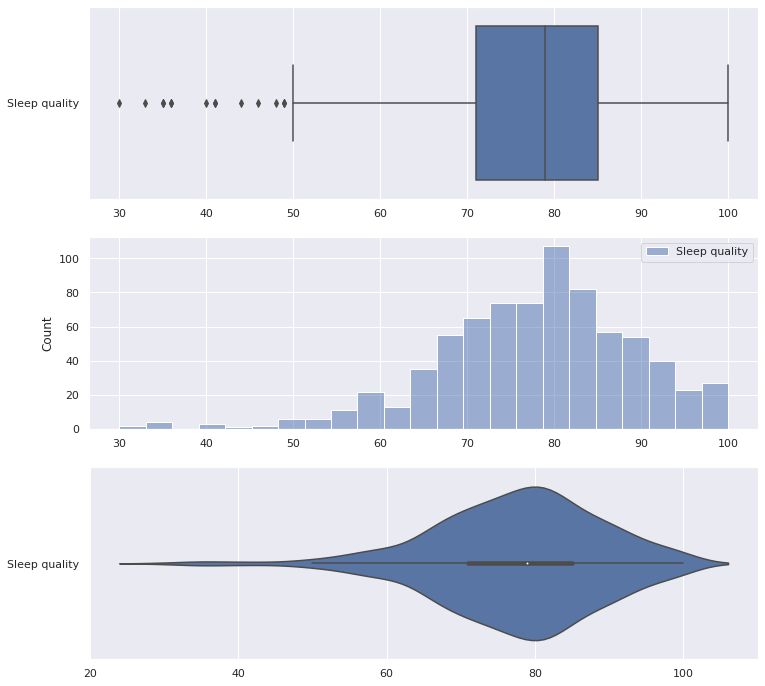

In [ ]:
f, axes = plt.subplots(3, 1, figsize=(12, 12))
sb.boxplot(data = sleep_data_clean[['Sleep quality']], orient = "h", ax = axes[0])
sb.histplot(data = sleep_data_clean[['Sleep quality']], ax = axes[1])
sb.violinplot(data = sleep_data_clean[['Sleep quality']], orient = "h", ax = axes[2])

Observations:
- `Sleep quality` data is centred at `79`
- `Sleep quality` data is not balanced and is more skewed towards the right (representing higher sleep quality)
- The data within the box of the boxplot (Q1-Q3) is between 71-85
- The boxplot is not symmetric as the left whisker is longer than the right whisker.

**Time series visualisation**

Since we have a date variable - `Start date` (date person went to sleep), we can visualise the trend of the `sleep quality` over the dates using a time-series diagram to see if we can find any patterns or anomaly

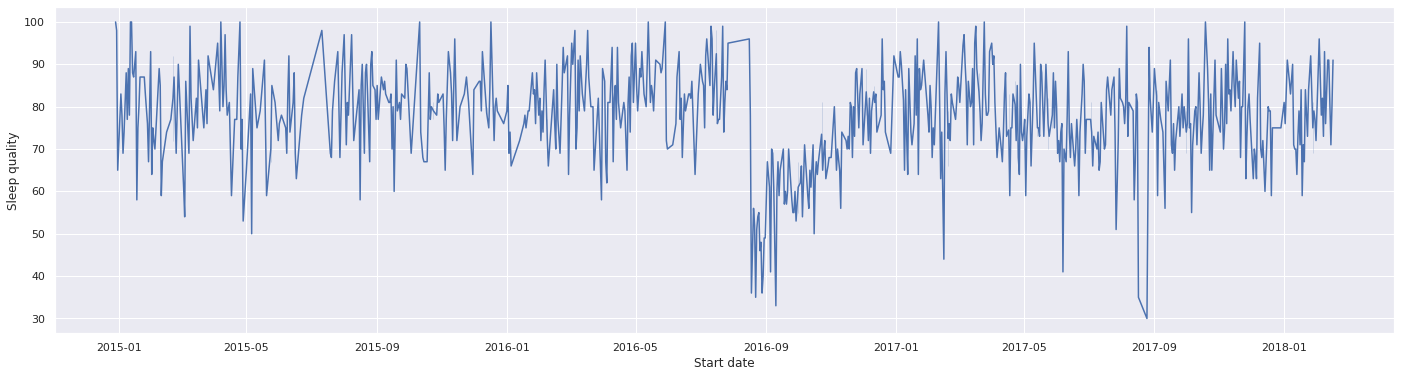

In [ ]:
plt.subplots(1, 1, figsize=(24, 6))
sb.lineplot(x='Start date', y='Sleep quality', data=sleep_data_clean)

Observations:
- The person had a big dip in sleep quality toward the end of 2016.
- After the big dip, the person's sleep quality steadily increased until 2017.
- The person seem to have more days of worse sleep quality after 2017.
- After 2017, the days of bad sleep quality were also much worse, with a few days going below sleep quality of `50`. 
- Other than that, there does not seem to be any significant patterns in the change of his sleep quality over time.

##Numerical Data


Now we will take a look at our numerical data

Check Summary Statistics using `describe`




In [ ]:
sleep_data_clean[['Sleep cycle offset']].describe()

,Sleep cycle offset
count,763.000000
mean,41.193971
std,28.168254
min,0.000000
25%,15.000000
50%,37.000000
75%,69.000000
max,89.000000


Check Summary Statistics visually using `boxplot`,  `histogram` and `violinplot`

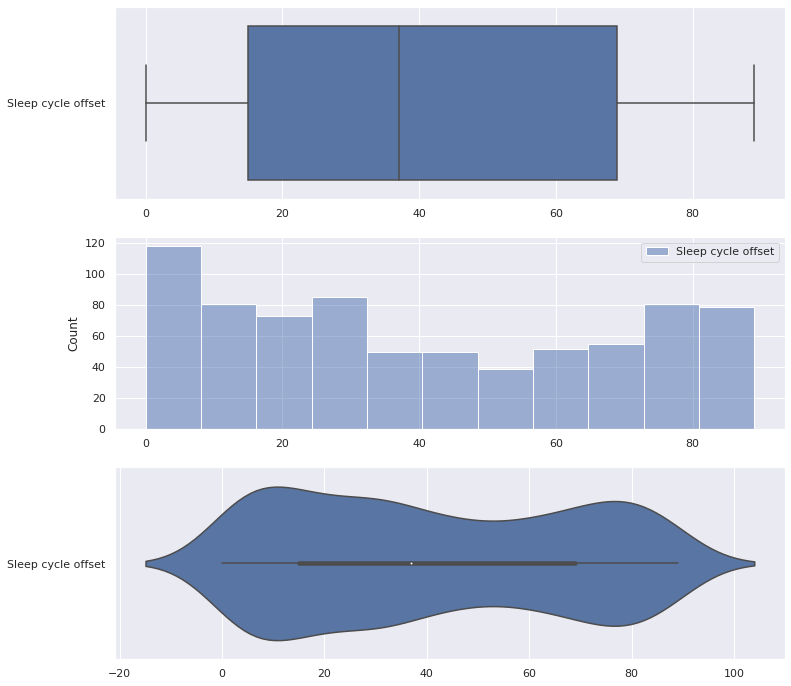

In [ ]:
f, axes = plt.subplots(3, 1, figsize=(12, 12))
sb.boxplot(data = sleep_data_clean[['Sleep cycle offset']], orient = "h", ax = axes[0])
sb.histplot(data = sleep_data_clean[['Sleep cycle offset']], ax = axes[1])
sb.violinplot(data = sleep_data_clean[['Sleep cycle offset']], orient = "h", ax = axes[2])

Observations:

- `Sleep cycle offset` data is centred at 37.
- From the histogram, we can see that the data has a relatively even distribution.
- The data within the box of the boxplot (Q1-Q3) is between 15-68. 

**Relationsship between our numerical data `Sleep cycle offset` and our response `Sleep quality`**

In [ ]:
#Extract the necessary data variables
numDF = sleep_data_clean[['Sleep quality','Sleep cycle offset']]

# Calculate the complete correlation matrix
numDF.corr()

,Sleep quality,Sleep cycle offset
Sleep quality,1.00000,-0.01533
Sleep cycle offset,-0.01533,1.00000


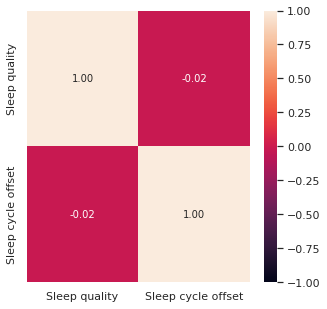

In [ ]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(5, 5))
sb.heatmap(numDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

From the heatmap and correlation data, we can see that `Sleep cycle offset` has very low correlation to our response variable (-0.02). This shows that these two variables have a poor linear relationship. However, we will not rule them out yet as they might have a non-linear relationship.

Check the scatterplots of our numeric data.

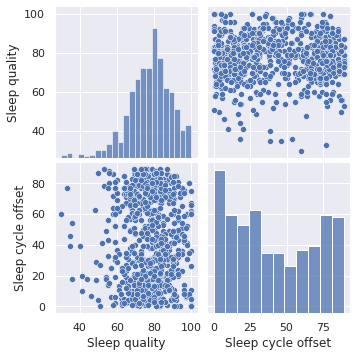

In [ ]:
# Draw pairs of variables against one another
sb.pairplot(data = numDF)

##Categorical Predictors

Now we will look at our categorical predictors.

In [ ]:
#Extract the necessary categorical data variables
catDF = sleep_data_clean[['Sleep cycle', 'Start time','Drank coffee', 'Drank tea',	'Worked out', 'Stressful day']]
catDF.head()

,Sleep cycle,Start time,Drank coffee,Drank tea,Worked out,Stressful day
0,5,23,False,False,False,False
1,5,23,False,False,False,False
2,5,23,False,False,False,False
3,4,1,True,True,False,False
4,4,0,False,True,False,False


**Relationship between Categorical Variables & Response Variable**

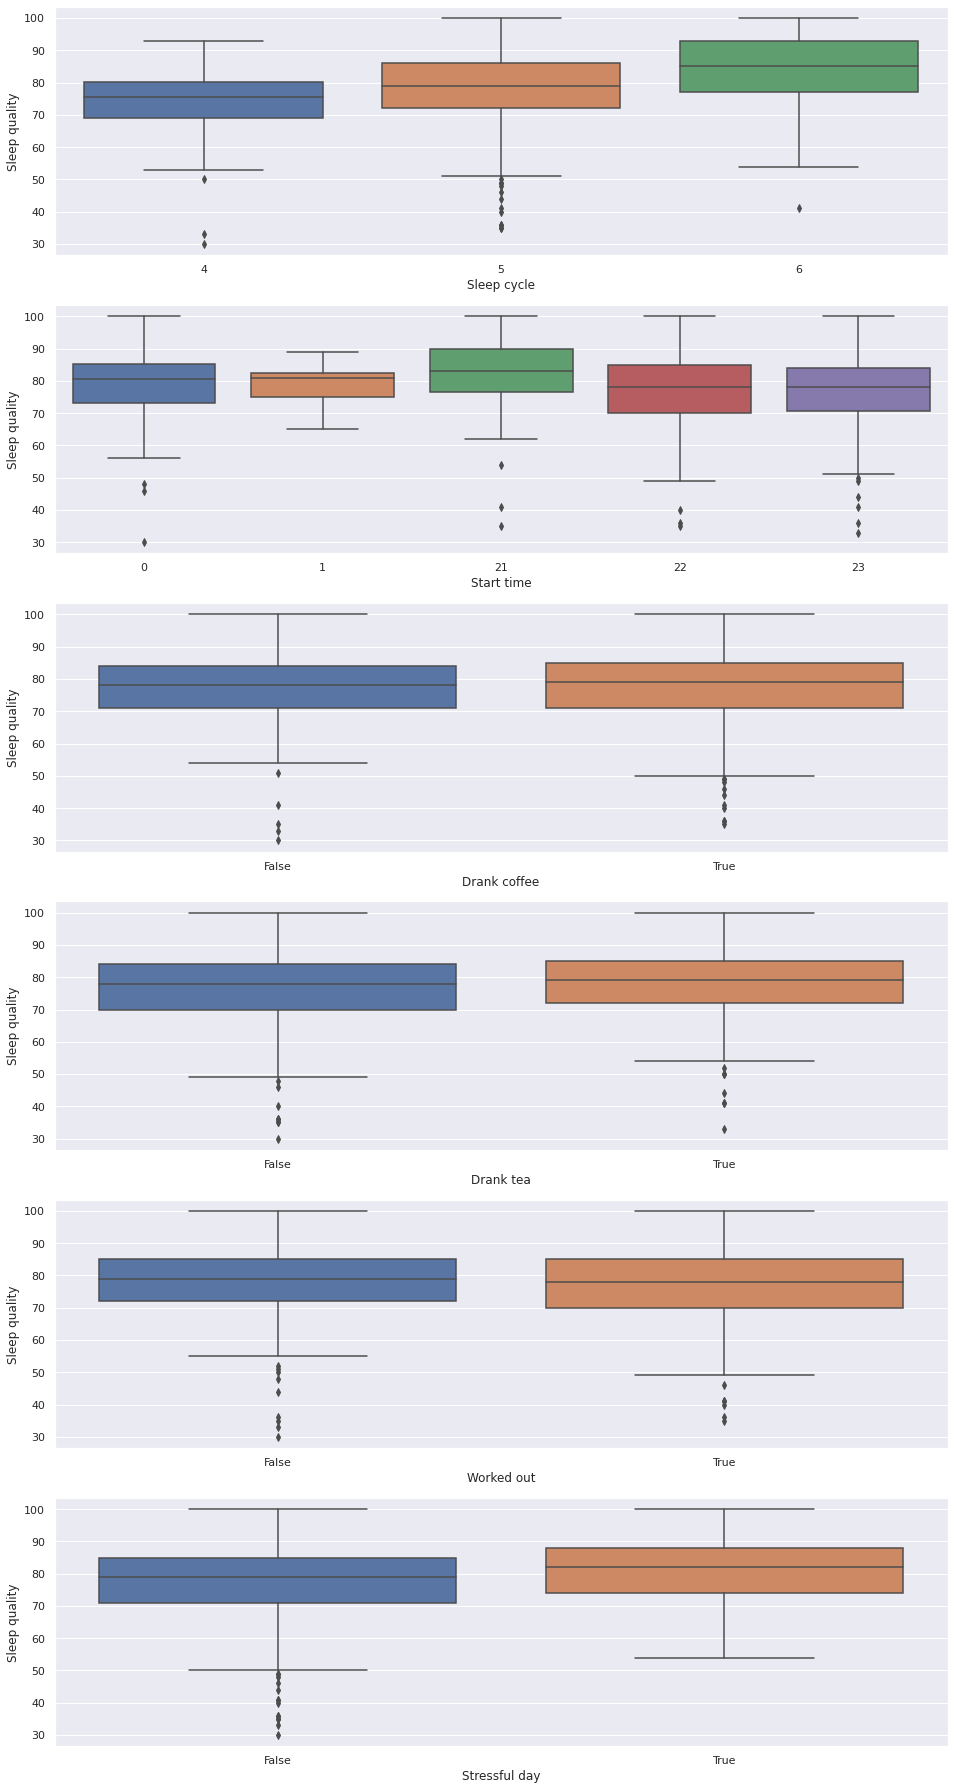

In [ ]:
f, axes = plt.subplots(6, 1, figsize=(16, 32))
count = 0
for var in catDF:
  sb.boxplot(x=var, y='Sleep quality', data=sleep_data_clean, ax=axes[count])
  count += 1

Observations:
- Generally, higher sleep cycles result in a higher sleep quality.
- Sleeping after `12` am will not allow you to obtain maximum sleep quality of `100`.
- The rest of the categorical variables do not seem to have any significant differences.

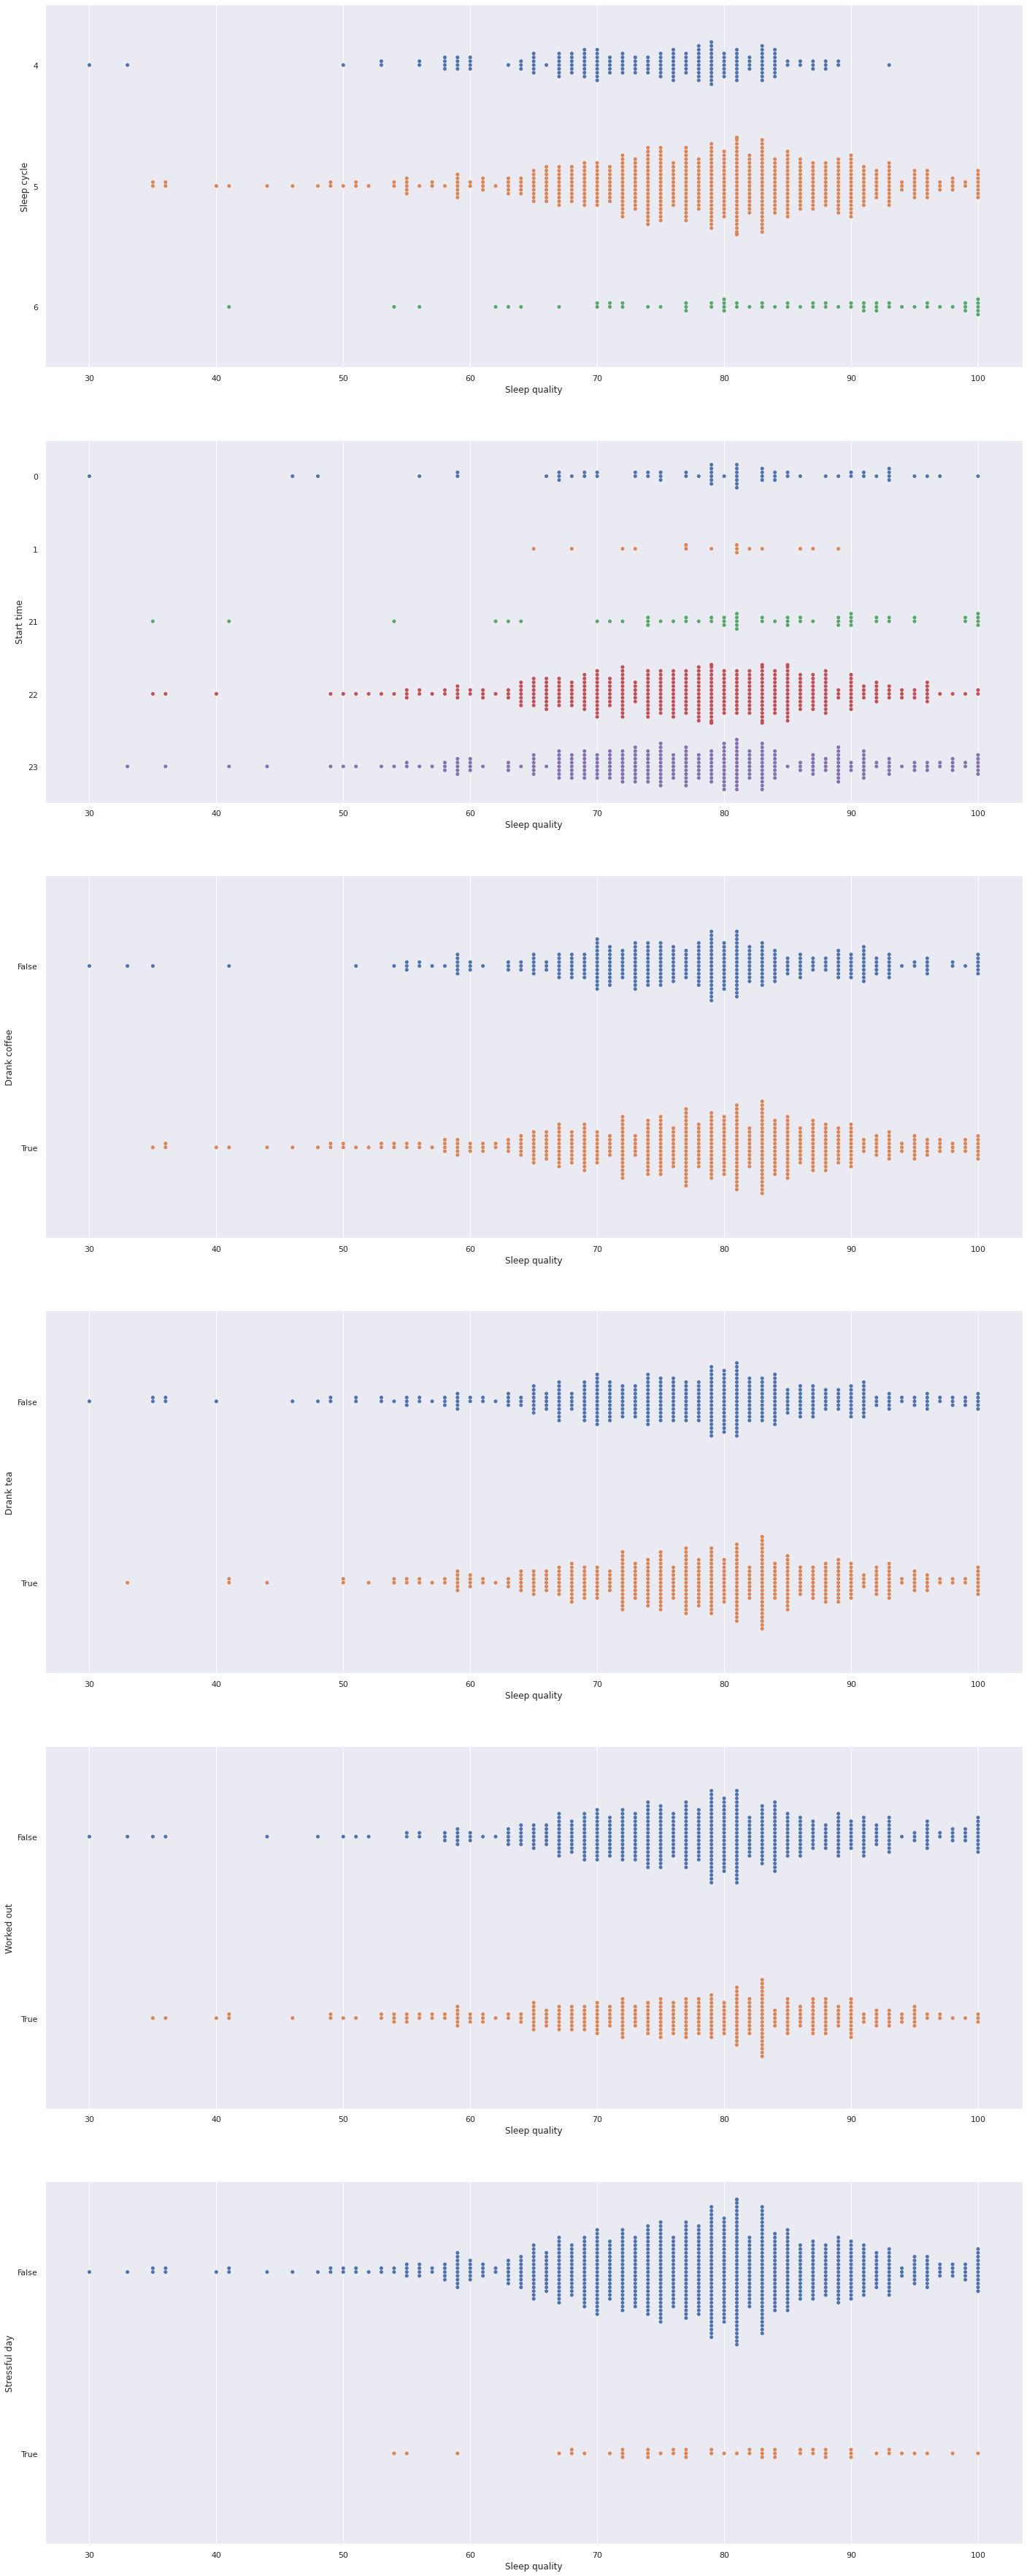

In [ ]:
# Joint Swarmplot
f, axes = plt.subplots(6, 1, figsize=(24, 64))
count = 0
for var in catDF:
  sb.swarmplot(x='Sleep quality', y=var, data=sleep_data_clean, orient = "h", ax=axes[count])
  count += 1

Sleep cycle Swarmplot:
- Apart from that 1 data point, having `6` sleep cycle almost guarantees a higher sleep quality of at least `50`.
- There is a higher possibility of having a sleep quality above `90`, with `5` or `6` sleep cycle.
- Sleep cycle of at least `5` is required to achieve maximum sleep quality of `100`

Drank coffee Swarmplot:
- There is a higher possibility of lower sleep quality (less than `50`) if you drink coffee

Stressful Day Swarmplot: 
- With a stressful day, a sleep quality of above `50` is guaranteed. 

Remaining Categorical Variable Swarmplot:
- There is a relatively similar spread of data points for each category. There is no significant differences between the categories.

# Machine Learning 

## Preprocessing

We will be doing label encoding for `Start time`.

Before: 0 (12am) was considered the lowest/ earliest value instead of 20 (8pm).

After : 20 (8pm) is the earliest `Start time` to sleep.

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# Copy EDA dataframe into a new dataframe for ML
sleep_data_labelEncoded = sleep_data_clean.copy()

sleep_data_labelEncoded['Start time'] = sleep_data_labelEncoded['Start time'].astype(str)
le.fit(sleep_data_labelEncoded['Start time'])
le.classes_ = np.array(['20','21','22','23','0','1','2','3']) 
sleep_data_labelEncoded['Start time'] = le.transform(sleep_data_labelEncoded['Start time'])

sleep_data_labelEncoded.head()

,Start date,Sleep quality,Drank coffee,Drank tea,Worked out,Stressful day,Sleep cycle,Sleep cycle offset,Start time
0,2014-12-29,100,False,False,False,False,5,62,3
1,2014-12-30,98,False,False,False,False,5,60,3
2,2014-12-31,65,False,False,False,False,5,2,3
3,2015-01-03,83,True,True,False,False,4,72,5
4,2015-01-04,78,False,True,False,False,4,74,4


## Information


**Variables we will be using in our machine learning models:**

Response Variable
- Sleep Quality 

Predictor Variables
- Drank coffee 
- Drank tea
- Worked out
- Stressful day
- Sleep cycle
- Sleep cycle offset 
- Start time



**Selected Machine Learning Models:**

Linear Regression:

*   Since we are doing a regression problem, we started off with linear regression as our default baseline as it is the most basic machine learning model for regression.

Random Forest:
* We choose Random Forest as it is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression. It is also able to handle non-linear relationships without the drawback of overfitting from decision trees.

Polynomial Regression:
* We choose Polynomial Regression as there might a non-linear relationship between the predictor variables and response variable that is not captured by the default linear regression model. By finding the non-linear relationship, we might be able to get a higher prediction accuracy.

**Sampling Methods:**

1.   Random Sampling
2.   K-Folds
3. Repeated K-Folds

We will then compare the MSE of the three sampling methods & the three machine learning models.



## Random Sampling

In [ ]:
#random sampling

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

test_score_data = [[],[],[]]
MSE_data = [[],[],[]]

# Total test score
total_linreg_score = 0
total_rf_reg_score = 0
total_poly_reg_score = 0

#Total MSE
total_linreg_MSE = 0
total_rf_reg_MSE = 0
total_poly_reg_MSE = 0

num = 5
for i in range(num):
  # Split the Dataset into random Train and Test
  sleep_data_train, sleep_data_test = train_test_split(sleep_data_labelEncoded, test_size = 0.2, random_state=i)

  # Check the sample sizes
  print("Train Set :", sleep_data_train.shape)
  print("Test Set  :", sleep_data_test.shape)
  print("Total Set :", sleep_data_labelEncoded.shape)

  # Response and Predictors
  # Can we predict a person's sleep quality using information on his sleep cycle, the time he goes to sleep, and his activities throughout the day?
  response_Arr = ['Sleep quality']
  predictors_Arr = ['Drank coffee', 'Drank tea', 'Worked out','Stressful day','Sleep cycle','Sleep cycle offset','Start time']

  # Split the train and test data into Response(y) and Predictors(x)
  Y_train = pd.DataFrame(sleep_data_train[response_Arr])
  X_train = pd.DataFrame(sleep_data_train[predictors_Arr])
  Y_test = pd.DataFrame(sleep_data_test[response_Arr])
  X_test = pd.DataFrame(sleep_data_test[predictors_Arr])
  # Check the sample sizes
  print("Train Set :", Y_train.shape, X_train.shape)
  print("Test Set  :", Y_test.shape, X_test.shape)

  # Import essential models and functions from sklearn
  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import mean_squared_error
  linreg = LinearRegression()
  linreg.fit(X_train,Y_train)
  #Formula for the regression line
  Y_test_pred = linreg.predict(X_test)
  total_linreg_score += linreg.score(X_test,Y_test)
  total_linreg_MSE += mean_squared_error(Y_test, Y_test_pred)
  print('Linear Regression:')
  print('Test Accuracy: ', linreg.score(X_test,Y_test))
  print("Mean Squared Error (MSE): ", mean_squared_error(Y_test, Y_test_pred))

  # Import essential models and functions from sklearn
  from sklearn.ensemble import RandomForestRegressor
  rf_reg = RandomForestRegressor(max_depth = 8, random_state = None, n_estimators=225)
  rf_reg.fit(X_train,Y_train.values.ravel())
  #Formula for the regression line
  Y_test_pred = rf_reg.predict(X_test)
  total_rf_reg_score += rf_reg.score(X_test,Y_test)
  total_rf_reg_MSE += mean_squared_error(Y_test, Y_test_pred)
  print('Random Forest:')
  print('Test Accuracy: ', rf_reg.score(X_test,Y_test))
  print("Mean Squared Error (MSE): ", mean_squared_error(Y_test, Y_test_pred))

  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.linear_model import LinearRegression
  from sklearn.pipeline import Pipeline
  #Be aware that the number of features in the output array scales polynomially in the number of features of 
  # the input array, and exponentially in the degree. High degrees can cause overfitting.
  poly_reg = Pipeline([('poly', PolynomialFeatures(degree=2)),
                    ('linear', LinearRegression(fit_intercept=False))])
  poly_reg.fit(X_train,Y_train)
  #Formula for the regression line
  Y_test_pred = poly_reg.predict(X_test)
  total_poly_reg_score += poly_reg.score(X_test,Y_test)
  total_poly_reg_MSE += mean_squared_error(Y_test, Y_test_pred)
  print('Polynomial Regression: ')
  print('Test Accuracy:', poly_reg.score(X_test,Y_test))
  print("Mean Squared Error (MSE): ", mean_squared_error(Y_test, Y_test_pred))
  print()


# average test score
avg_linreg_score = total_linreg_score/num
avg_rf_reg_score = total_rf_reg_score/num
avg_poly_reg_score = total_poly_reg_score/num
print('Average test scores:')
print('avg_linreg_score:',avg_linreg_score)
print('avg_rf_reg_score',avg_rf_reg_score)
print('avg_poly_reg_score',avg_poly_reg_score)
print()

# average MSE
avg_linreg_MSE = total_linreg_MSE / num
avg_rf_reg_MSE = total_rf_reg_MSE / num
avg_poly_reg_MSE = total_poly_reg_MSE / num
print('Average MSE:')
print('avg_linreg_MSE:',avg_linreg_MSE)
print('avg_rf_reg_MSE',avg_rf_reg_MSE)
print('avg_poly_reg_MSE',avg_poly_reg_MSE)

test_score_data[0] = [avg_linreg_score,avg_rf_reg_score,avg_poly_reg_score]
MSE_data[0] = [avg_linreg_MSE,avg_rf_reg_MSE,avg_poly_reg_MSE]

Train Set : (610, 9)
Test Set  : (153, 9)
Total Set : (763, 9)
Train Set : (610, 1) (610, 7)
Test Set  : (153, 1) (153, 7)
Linear Regression:
Test Accuracy:  0.08346469245157917
Mean Squared Error (MSE):  125.93004841568406
Random Forest:
Test Accuracy:  0.03152598636341786
Mean Squared Error (MSE):  133.0663188009737
Polynomial Regression: 
Test Accuracy: 0.05057036383136393
Mean Squared Error (MSE):  130.44966087537784

Train Set : (610, 9)
Test Set  : (153, 9)
Total Set : (763, 9)
Train Set : (610, 1) (610, 7)
Test Set  : (153, 1) (153, 7)
Linear Regression:
Test Accuracy:  0.09140765008049567
Mean Squared Error (MSE):  149.8443408323781
Random Forest:
Test Accuracy:  0.07779679967834419
Mean Squared Error (MSE):  152.08903165203904
Polynomial Regression: 
Test Accuracy: 0.07846830656360726
Mean Squared Error (MSE):  151.97828726089867

Train Set : (610, 9)
Test Set  : (153, 9)
Total Set : (763, 9)
Train Set : (610, 1) (610, 7)
Test Set  : (153, 1) (153, 7)
Linear Regression:
Test A

## K-Folds

K-fold cross validation guarantees that every object is used k-1 times for learning, and 1 time for testing. This yields more stable results compared to random sampling as every data point is equally important.


In [ ]:
#k-folds

# Total test score
total_linreg_score = 0
total_rf_reg_score = 0
total_poly_reg_score = 0

#Total MSE
total_linreg_MSE = 0
total_rf_reg_MSE = 0
total_poly_reg_MSE = 0

import numpy as np
from sklearn.model_selection import KFold
num_of_folds = 5
seed = 1
kf = KFold(n_splits=num_of_folds,shuffle=True,random_state=1)

for train_index, test_index in kf.split(sleep_data_labelEncoded):
  
  #split into train and test by index
  sleep_data_train = sleep_data_labelEncoded.iloc[train_index]
  sleep_data_test = sleep_data_labelEncoded.iloc[test_index]
  # print(sleep_data_train)
  # print()
  # print(sleep_data_test)
  # print()
  
  # Check the sample sizes
  print("Train Set :", Y_train.shape, X_train.shape)
  print("Test Set  :", Y_test.shape, X_test.shape)

  # Response and Predictors
  # Can we predict a person's sleep quality using information on his sleep cycle, the time he goes to sleep, and his activities throughout the day?
  response_Arr = ['Sleep quality']
  predictors_Arr = ['Drank coffee', 'Drank tea', 'Worked out','Stressful day','Sleep cycle','Sleep cycle offset','Start time']
  # Split the train and test data into Response(y) and Predictors(x)
  Y_train = pd.DataFrame(sleep_data_train[response_Arr])
  X_train = pd.DataFrame(sleep_data_train[predictors_Arr])
  Y_test = pd.DataFrame(sleep_data_test[response_Arr])
  X_test = pd.DataFrame(sleep_data_test[predictors_Arr])

  # Import essential models and functions from sklearn
  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import mean_squared_error
  linreg = LinearRegression()
  linreg.fit(X_train,Y_train)
  #Formula for the regression line
  Y_test_pred = linreg.predict(X_test)
  total_linreg_score += linreg.score(X_test,Y_test)
  total_linreg_MSE += mean_squared_error(Y_test, Y_test_pred)
  print('Linear Regression:')
  print('Test Accuracy: ', linreg.score(X_test,Y_test))
  print("Mean Squared Error (MSE): ", mean_squared_error(Y_test, Y_test_pred))

  # Import essential models and functions from sklearn
  from sklearn.ensemble import RandomForestRegressor
  rf_reg = RandomForestRegressor(max_depth = 8, random_state = None, n_estimators=225)
  rf_reg.fit(X_train,Y_train.values.ravel())
  #Formula for the regression line
  Y_test_pred = rf_reg.predict(X_test)
  total_rf_reg_score += rf_reg.score(X_test,Y_test)
  total_rf_reg_MSE += mean_squared_error(Y_test, Y_test_pred)
  print('Random Forest:')
  print('Test Accuracy: ', rf_reg.score(X_test,Y_test))
  print("Mean Squared Error (MSE): ", mean_squared_error(Y_test, Y_test_pred))

  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.linear_model import LinearRegression
  from sklearn.pipeline import Pipeline
  #Be aware that the number of features in the output array scales polynomially in the number of features of 
  # the input array, and exponentially in the degree. High degrees can cause overfitting.
  poly_reg = Pipeline([('poly', PolynomialFeatures(degree=2)),
                    ('linear', LinearRegression(fit_intercept=False))])
  poly_reg.fit(X_train,Y_train)
  #Formula for the regression line
  Y_test_pred = poly_reg.predict(X_test)
  total_poly_reg_score += poly_reg.score(X_test,Y_test)
  total_poly_reg_MSE += mean_squared_error(Y_test, Y_test_pred)
  print('Polynomial Regression:')
  print('Test Accuracy: ', poly_reg.score(X_test,Y_test))
  print("Mean Squared Error (MSE): ", mean_squared_error(Y_test, Y_test_pred))
  print()


# average test score
avg_linreg_score = total_linreg_score/num_of_folds
avg_rf_reg_score = total_rf_reg_score/num_of_folds
avg_poly_reg_score = total_poly_reg_score/num_of_folds
print('Average test scores:')
print('avg_linreg_score:',avg_linreg_score)
print('avg_rf_reg_score',avg_rf_reg_score)
print('avg_poly_reg_score',avg_poly_reg_score)
print()

#average MSE
avg_linreg_MSE = total_linreg_MSE / num_of_folds
avg_rf_reg_MSE = total_rf_reg_MSE / num_of_folds
avg_poly_reg_MSE = total_poly_reg_MSE / num_of_folds
print('Average MSE:')
print('avg_linreg_MSE:',avg_linreg_MSE)
print('avg_rf_reg_MSE',avg_rf_reg_MSE)
print('avg_poly_reg_MSE',avg_poly_reg_MSE)

test_score_data[1] = [avg_linreg_score,avg_rf_reg_score,avg_poly_reg_score]
MSE_data[1] = [avg_linreg_MSE,avg_rf_reg_MSE,avg_poly_reg_MSE]

Train Set : (610, 1) (610, 7)
Test Set  : (153, 1) (153, 7)
Linear Regression:
Test Accuracy:  0.09140765008049612
Mean Squared Error (MSE):  149.84434083237807
Random Forest:
Test Accuracy:  0.09137426384948366
Mean Squared Error (MSE):  149.84984686352544
Polynomial Regression:
Test Accuracy:  0.07846830656357484
Mean Squared Error (MSE):  151.97828726090407

Train Set : (610, 1) (610, 7)
Test Set  : (153, 1) (153, 7)
Linear Regression:
Test Accuracy:  0.1260664829990874
Mean Squared Error (MSE):  107.86248821033494
Random Forest:
Test Accuracy:  0.098036720605152
Mean Squared Error (MSE):  111.3219732363008
Polynomial Regression:
Test Accuracy:  0.17976980533045028
Mean Squared Error (MSE):  101.23432501583831

Train Set : (610, 1) (610, 7)
Test Set  : (153, 1) (153, 7)
Linear Regression:
Test Accuracy:  0.045092593631159694
Mean Squared Error (MSE):  125.44968065268316
Random Forest:
Test Accuracy:  -0.07043905888583879
Mean Squared Error (MSE):  140.6274966554381
Polynomial Regres

## Repeated K-folds

Repeated k-fold cross-validation has the benefit of improving the estimate of the mean model performance at the cost of fitting and evaluating many more models. 

The mean performance reported from a single run of k-fold cross-validation may be noisy.
Repeated k-fold cross-validation provides a way to reduce the error in the estimate of mean model performance. 

In [ ]:
#repeated k-folds

# Total test score
total_linreg_score = 0
total_rf_reg_score = 0
total_poly_reg_score = 0

#Total MSE
total_linreg_MSE = 0
total_rf_reg_MSE = 0
total_poly_reg_MSE = 0

import numpy as np
from sklearn.model_selection import RepeatedKFold

num_of_folds = 5
num_of_repeats = 3
num_of_iter = num_of_folds * num_of_repeats
seed = 1
rkf = RepeatedKFold(n_splits=num_of_folds, n_repeats=num_of_repeats, random_state=seed)
for train_index, test_index in rkf.split(sleep_data_labelEncoded):
  
  #split into train and test by index
  sleep_data_train = sleep_data_labelEncoded.iloc[train_index]
  sleep_data_test = sleep_data_labelEncoded.iloc[test_index]
  # print(sleep_data_train)
  # print()
  # print(sleep_data_test)
  # print()

  # Check the sample sizes
  print("Train Set :", Y_train.shape, X_train.shape)
  print("Test Set  :", Y_test.shape, X_test.shape)

  # Response and Predictors
  # Can we predict a person's sleep quality using information on his sleep cycle, the time he goes to sleep, and his activities throughout the day?
  response_Arr = ['Sleep quality']
  predictors_Arr = ['Drank coffee', 'Drank tea', 'Worked out','Stressful day','Sleep cycle','Sleep cycle offset','Start time']
  # Split the train and test data into Response(y) and Predictors(x)
  Y_train = pd.DataFrame(sleep_data_train[response_Arr])
  X_train = pd.DataFrame(sleep_data_train[predictors_Arr])
  Y_test = pd.DataFrame(sleep_data_test[response_Arr])
  X_test = pd.DataFrame(sleep_data_test[predictors_Arr])

  # Import essential models and functions from sklearn
  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import mean_squared_error
  linreg = LinearRegression()
  linreg.fit(X_train,Y_train)
  #Formula for the regression line
  Y_test_pred = linreg.predict(X_test)
  total_linreg_score += linreg.score(X_test,Y_test)
  total_linreg_MSE += mean_squared_error(Y_test, Y_test_pred)
  print('Linear Regression:')
  print('Test Accuracy: ', linreg.score(X_test,Y_test))
  print("Mean Squared Error (MSE): ", mean_squared_error(Y_test, Y_test_pred))

  # Import essential models and functions from sklearn
  from sklearn.ensemble import RandomForestRegressor
  rf_reg = RandomForestRegressor(max_depth = 8, random_state = None, n_estimators=225)
  rf_reg.fit(X_train,Y_train.values.ravel())
  #Formula for the regression line
  Y_test_pred = rf_reg.predict(X_test)
  total_rf_reg_score += rf_reg.score(X_test,Y_test)
  total_rf_reg_MSE += mean_squared_error(Y_test, Y_test_pred)
  print('Random Forest:')
  print('Test Accuracy: ', rf_reg.score(X_test,Y_test))
  print("Mean Squared Error (MSE): ", mean_squared_error(Y_test, Y_test_pred))

  from sklearn.preprocessing import PolynomialFeatures
  from sklearn.linear_model import LinearRegression
  from sklearn.pipeline import Pipeline
  #Be aware that the number of features in the output array scales polynomially in the number of features of 
  # the input array, and exponentially in the degree. High degrees can cause overfitting.
  poly_reg = Pipeline([('poly', PolynomialFeatures(degree=2)),
                    ('linear', LinearRegression(fit_intercept=False))])
  poly_reg.fit(X_train,Y_train)
  #Formula for the regression line
  Y_test_pred = poly_reg.predict(X_test)
  total_poly_reg_score += poly_reg.score(X_test,Y_test)
  total_poly_reg_MSE += mean_squared_error(Y_test, Y_test_pred)
  print('Polynomial Regression: ')
  print('Test Accuracy:', poly_reg.score(X_test,Y_test))
  print("Mean Squared Error (MSE): ", mean_squared_error(Y_test, Y_test_pred))
  print()

# average test score
avg_linreg_score = total_linreg_score / num_of_iter
avg_rf_reg_score = total_rf_reg_score / num_of_iter
avg_poly_reg_score = total_poly_reg_score / num_of_iter
print('Average test scores:')
print('avg_linreg_score:',avg_linreg_score)
print('avg_rf_reg_score',avg_rf_reg_score)
print('avg_poly_reg_score',avg_poly_reg_score)
print()

# average MSE
avg_linreg_MSE = total_linreg_MSE / num_of_iter
avg_rf_reg_MSE = total_rf_reg_MSE / num_of_iter
avg_poly_reg_MSE = total_poly_reg_MSE / num_of_iter
print('Average MSE:')
print('avg_linreg_MSE:',avg_linreg_MSE)
print('avg_rf_reg_MSE',avg_rf_reg_MSE)
print('avg_poly_reg_MSE',avg_poly_reg_MSE)

test_score_data[2] = [avg_linreg_score,avg_rf_reg_score,avg_poly_reg_score]
MSE_data[2] = [avg_linreg_MSE,avg_rf_reg_MSE,avg_poly_reg_MSE]

Train Set : (611, 1) (611, 7)
Test Set  : (152, 1) (152, 7)
Linear Regression:
Test Accuracy:  0.09140765008049612
Mean Squared Error (MSE):  149.84434083237807
Random Forest:
Test Accuracy:  0.0678279216877351
Mean Squared Error (MSE):  153.73309122559104
Polynomial Regression: 
Test Accuracy: 0.07846830656357484
Mean Squared Error (MSE):  151.97828726090407

Train Set : (610, 1) (610, 7)
Test Set  : (153, 1) (153, 7)
Linear Regression:
Test Accuracy:  0.1260664829990874
Mean Squared Error (MSE):  107.86248821033494
Random Forest:
Test Accuracy:  0.09627617529681531
Mean Squared Error (MSE):  111.53926298874777
Polynomial Regression: 
Test Accuracy: 0.17976980533045028
Mean Squared Error (MSE):  101.23432501583831

Train Set : (610, 1) (610, 7)
Test Set  : (153, 1) (153, 7)
Linear Regression:
Test Accuracy:  0.045092593631159694
Mean Squared Error (MSE):  125.44968065268316
Random Forest:
Test Accuracy:  -0.07520716514149006
Mean Squared Error (MSE):  141.25390022409835
Polynomial Reg

## Comparison of Machine Learning Model Results

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

columns = ['Linear Regression', 'Random Forest', 'Polynomial Regression']
rows = ['Random Sampling','K-folds','Repeated K-folds']

print("Testing Accuracy:")

tb1 = pd.DataFrame(test_score_data)
tb1 = tb1.set_axis(columns,axis = 1)
tb1 = tb1.set_axis(rows,axis = 0)
tb1.style.highlight_max(color = 'lightgreen', axis = 1)

Testing Accuracy:


,Linear Regression,Random Forest,Polynomial Regression
Random Sampling,0.045887,0.000937,0.031482
K-folds,0.073587,0.002617,0.056446
Repeated K-folds,0.074526,0.020816,0.064827


For testing accuracy, the higher the value, the better the model.

Based on this matrix, linear regression have the highest testing accuracy for all 3 sampling methods.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

columns = ['Linear Regression', 'Random Forest', 'Polynomial Regression']
rows = ['Random Sampling','K-folds','Repeated K-folds']

print("Mean Squared Error:")
tb2 = pd.DataFrame(MSE_data)
tb2 = tb2.set_axis(columns,axis = 1)
tb2 = tb2.set_axis(rows,axis = 0)
tb2.style.highlight_min(color = 'lightgreen', axis = 1)

Mean Squared Error:


,Linear Regression,Random Forest,Polynomial Regression
Random Sampling,129.168496,135.121649,131.226464
K-folds,119.617830,128.126001,121.753478
Repeated K-folds,119.723235,126.231120,120.819316


For mean squared error, the lesser the error value, the better the model. 

Based on the matrix, it shows that linear regression have the best MSE for all 3 sampling methods.


#Conclusion

## Outcome of Project

- More sleep cycles and having a stressful day results in better sleep quality
- Remaining variables have low correlation to sleep quality
- Out of the 3 models we used, linear Regression produced the best results
- However, since all 3 models produced low accuracy, we conclude that sleep quality cannot be accurately predicted with just sleep cycle, time going to sleep & lifestyle. To accurately predict sleep quality, other variables or models have to be explored.



## Recommendation

- Create a more balanced response variable through methods such as resampling. This is because for our model, the response variable, `Sleep quality`, is more skewed towards the right (representing higher sleep quality).


- Collect more types of data as the data may become too small to measure the actual accuracy of the models. 


- Since this data is only about one person, it may be biased and hard to make accurate analysis of the information being given. It will be better to have a specific range/group of sleep information to give.(Continuation of point 2) Or a specific research centre/sleep centre of information to analyse will generate more interesting insights. 


- Since there is a lack of correlation for the variables we used, we recommend considering other variables that could also affect sleep quality.


# References


- https://towardsdatascience.com/getting-started-with-xgboost-in-scikit-learn-f69f5f470a97 
- https://machinelearningmastery.com/gradient-boosting-with-scikit-learn-xgboost-lightgbm-and-catboost/
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedKFold.html